<a href="https://colab.research.google.com/github/TemiOyee/Algorithmic-Trading-Strategy-Evaluation-and-Optimization-using-Machine-Learning-/blob/main/Algorithmic_Trading_Strategy_Evaluation_and_Optimization_using_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **ALGORITHMIC TRADING STRATEGY EVALUATION AND OPTIMIZATION USING MACHINE LEARNING**

# **BACKGROUND STUDY**

**Problem Statement**

The objective of this project is to evaluate and optimize various algorithmic trading strategies for a specific stock (in this case, Apple Inc. (AAPL)) using machine learning techniques. By analyzing historical stock data and implementing different trading strategies, we aim to identify the most effective approaches for generating profitable trading signals. Additionally, we explore the potential of ensemble methods and machine learning models to combine the strengths of multiple strategies and improve overall performance.

**Aims and Objectives**

1. Implement and evaluate individual trading strategies: Develop and assess the performance of individual trading strategies, including Momentum, Moving Average Crossover, Relative Strength Index (RSI), and Bollinger Bands.

2. Analyze strategy performance: Calculate and compare various performance metrics, such as cumulative returns, annualized returns, maximum drawdown, and Sharpe ratio, for each trading strategy.
3. Visualize strategy results: Create informative visualizations to better understand the performance and characteristics of each trading strategy.
4. Explore ensemble strategies: Investigate the potential benefits of combining individual strategies through ensemble methods, such as equal weighting and risk parity.
5. Apply machine learning for strategy optimization: Utilize a machine learning model (Random Forest Regressor) to optimize and combine the individual trading strategies, leveraging their collective strength.
6. Evaluate the machine learning ensemble strategy: Assess the performance of the machine learning ensemble strategy and compare it with the individual and ensemble strategies.
7. Perform further exploration: Incorporate additional market data (e.g., market indices) to enhance the machine learning model's predictive capabilities and explore potential improvements.



**Data Description**

The analysis is performed using historical stock data for Apple Inc. (AAPL), obtained from the Yahoo Finance API using the yfinance library.

The dataset includes various features such as Open, High, Low, Close prices, Volume, and Adjusted Close.

Additionally, the code demonstrates how to fetch and incorporate additional market data, such as major market indices (S&P 500 and Nasdaq), to potentially improve the machine learning model's performance.

# **METHODOLOGY**

The analysis is conducted using Python and various libraries, including Pandas for data manipulation, Matplotlib and Plotly for data visualization, scikit-learn for machine learning, and yfinance for fetching stock data.

The methodology involves the following steps:

1. Data Preparation: Load the stock data, handle missing values, and perform any necessary data cleaning or preprocessing.

2. Implementation of Individual Trading Strategies: Develop and implement individual trading strategies, such as Momentum, Moving Average Crossover, Relative Strength Index (RSI), and Bollinger Bands.
3. Performance Evaluation: Calculate performance metrics (cumulative returns, annualized returns, maximum drawdown, and Sharpe ratio) for each individual trading strategy.
4. Visualization: Create informative plots and charts to visualize the performance of individual trading strategies.
5. Ensemble Strategies: Explore ensemble methods, such as equal weighting and risk parity, to combine the individual trading strategies.
6. Machine Learning Ensemble Strategy: Utilize a Random Forest Regressor to combine the individual trading strategies and optimize the overall ensemble strategy.
7. Evaluation and Comparison: Assess the performance of the machine learning ensemble strategy and compare it with individual and ensemble strategies.

# **CODE IMPLEMENTATION**

## **Data Preparation**

In this section, we import the necessary libraries (Pandas, NumPy, and yfinance) and fetch the historical stock data for Apple Inc. (AAPL) from Yahoo Finance. The yf.Ticker("AAPL") function creates a Ticker object for Apple's stock, and the stock.history(period="1y") method retrieves the stock's historical data for the past year. The print(data.head()) statement displays the first few rows of the data for initial inspection.

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import yfinance as yf

# Get Apple's stock data from yahoo finance
stock = yf.Ticker("AAPL")
data = stock.history(period="1y")
print(data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-05-08 00:00:00-04:00  171.564238  172.926975  171.196208  172.578827   
2023-05-09 00:00:00-04:00  172.131220  172.618608  170.688921  170.858017   
2023-05-10 00:00:00-04:00  172.101393  173.106025  170.987329  172.638519   
2023-05-11 00:00:00-04:00  172.926975  173.663036  171.255886  172.827499   
2023-05-12 00:00:00-04:00  172.937063  173.375334  170.327373  171.891205   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-05-08 00:00:00-04:00  55962800       0.00           0.0  
2023-05-09 00:00:00-04:00  45326900       0.00           0.0  
2023-05-10 00:00:00-04:00  53724500       0.00           0.0  
2023-05-11 00:00:00-04:00  49514700       0.00           0.0  
2023-05-12 00:00:00-04:00  45497800       0.24           0.0  


## **Implementation of Individual Trading Strategies**

### **Momentum strategy**


The Momentum strategy is based on the idea that a stock's price momentum tends to persist in the short term. In this section, we calculate the stock's momentum by taking the percentage change in the closing prices. We then create a subplot using Plotly's make_subplots function to visualize the closing prices and momentum values.

Additionally, we add markers to the plot to indicate buy and sell signals based on the momentum values. If the momentum is positive, we mark it as a buy signal (green triangle), and if it's negative, we mark it as a sell signal (red triangle).

Finally, we calculate the momentum signals by applying a lambda function to the momentum column (1 for positive momentum, -1 for negative momentum), shift the signals by one day to avoid lookahead bias, and calculate the momentum strategy returns by multiplying the shifted signals with the daily percentage change in closing prices.

In [2]:
# Calculation of momentum
data['momentum'] = data['Close'].pct_change()

# Creating subplots to show momentum and buying/selling markers
figure = make_subplots(rows=2, cols=1)
figure.add_trace(go.Scatter(x=data.index,
                         y=data['Close'],
                         name='Close Price'))
figure.add_trace(go.Scatter(x=data.index,
                         y=data['momentum'],
                         name='Momentum',
                         yaxis='y2'))

# Adding the buy and sell signals
figure.add_trace(go.Scatter(x=data.loc[data['momentum'] > 0].index,
                         y=data.loc[data['momentum'] > 0]['Close'],
                         mode='markers', name='Buy',
                         marker=dict(color='green', symbol='triangle-up')))

figure.add_trace(go.Scatter(x=data.loc[data['momentum'] < 0].index,
                         y=data.loc[data['momentum'] < 0]['Close'],
                         mode='markers', name='Sell',
                         marker=dict(color='red', symbol='triangle-down')))

figure.update_layout(title='Algorithmic Trading using Momentum Strategy',
                  xaxis_title='Date',
                  yaxis_title='Price')
figure.update_yaxes(title="Momentum", secondary_y=True)
figure.show()

In [3]:
data['momentum'] = data['Close'].pct_change()
momentum_signals = data['momentum'].apply(lambda x: 1 if x > 0 else -1)
momentum_returns = momentum_signals.shift(1) * data['Close'].pct_change()

### **Moving Average Crossover Strategy**

The Moving Average Crossover strategy is based on the idea that a stock's price tends to follow its moving averages, and crossovers between different moving averages can indicate potential buy or sell signals. In this section, we calculate the 20-day and 50-day simple moving averages (SMA) for the closing prices.

We then create trading signals by comparing the 20-day SMA with the 50-day SMA. If the 20-day SMA is above the 50-day SMA, we assign a buy signal (1.0), and if it's below, we assign a sell signal (-1.0). The signals are shifted by one day to avoid lookahead bias.

Next, we calculate the strategy returns by multiplying the shifted signals with the daily percentage change in closing prices. Finally, we visualize the closing prices, moving averages, and trading signals using Matplotlib's plotting functionality.

<ipython-input-4-631c932ae308>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Date'>

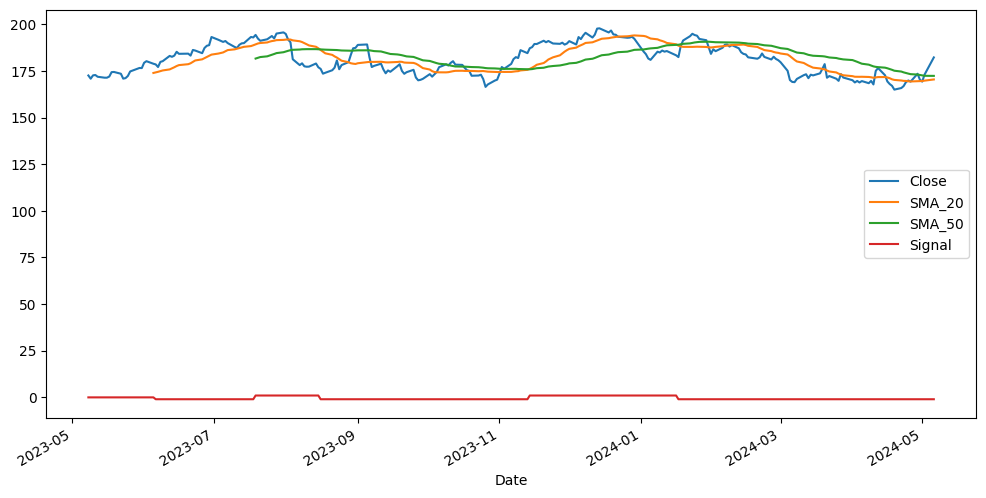

In [4]:
# Calculate moving averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Create trading signals
data['Signal'] = 0.0
data['Signal'][20:] = np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1.0, -1.0)

# Calculate strategy returns
data['Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Visualize results
data[['Close', 'SMA_20', 'SMA_50', 'Signal']].plot(figsize=(12, 6))

In [5]:
# Moving Average Crossover Strategy
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Signal'] = 0.0
data['Signal'][20:] = np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1.0, -1.0)
ma_returns = data['Signal'].shift(1) * data['Close'].pct_change()

<ipython-input-5-4bcc3bc1b400>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Relative Strength Index (RSI) Strategy**

The Relative Strength Index (RSI) strategy is a momentum oscillator that measures the speed and change of price movements. In this section, we calculate the RSI by first computing the average gains and losses over a 14-day period. The RSI is then calculated as 100 - (100 / (1 + (average_gain / average_loss))). The RSI oscillates between 0 and 100, with values below 30 considered oversold and above 70 considered overbought.

Next, we create trading signals based on the RSI. If the current RSI crosses below 30 from above, we generate a long signal (1.0), and if it crosses above 70 from below, we generate a short signal (-1.0). We then calculate the strategy returns by shifting the signal by one period and multiplying it by the daily percentage change in the closing price.

In the second part of the code, we repeat the RSI calculation and create a separate 'RSI_Signal' column based on the same rules as before. We then calculate the RSI strategy returns separately, using the 'RSI_Signal' column instead of the 'Signal' column.

Finally, we visualize the closing prices, RSI, and trading signals using a line plot. This allows us to see how the RSI oscillates over time and how the trading signals align with price movements.


<ipython-input-6-7efbb6bb67c6>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Date'>

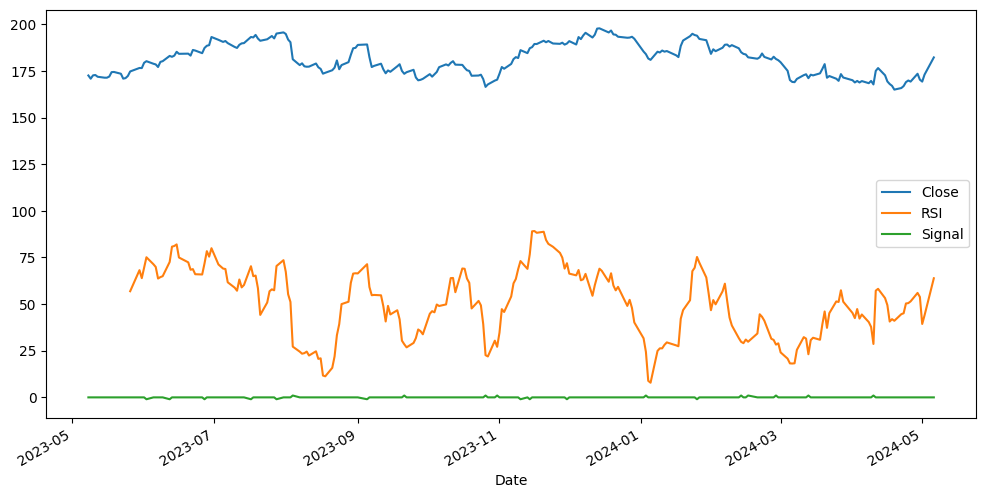

In [6]:
# Calculate RSI
delta = data['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Create trading signals
data['Signal'] = 0.0
data['Signal'][14:] = np.where((data['RSI'][14:] < 30) & (data['RSI'][14:].shift(1) >= 30), 1.0, np.where((data['RSI'][14:] > 70) & (data['RSI'][14:].shift(1) <= 70), -1.0, 0.0))

# Calculate strategy returns
data['Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Visualize results
data[['Close', 'RSI', 'Signal']].plot(figsize=(12, 6))

In [7]:
delta = data['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data['RSI_Signal'] = 0.0
data['RSI_Signal'][14:] = np.where((data['RSI'][14:] < 30) & (data['RSI'][14:].shift(1) >= 30), 1.0, np.where((data['RSI'][14:] > 70) & (data['RSI'][14:].shift(1) <= 70), -1.0, 0.0))
rsi_returns = data['RSI_Signal'].shift(1) * data['Close'].pct_change()


<ipython-input-7-9f9bc927931d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Bollinger Bands Strategy**

The Bollinger Bands strategy is a volatility-based trading approach that uses a moving average and standard deviations to identify potential overbought and oversold conditions. In this section, we calculate the 20-day simple moving average (SMA) and the 20-day standard deviation for the closing prices.

We then compute the upper and lower Bollinger Bands by adding and subtracting two times the standard deviation from the SMA, respectively. Trading signals are generated based on the price crossing these bands. If the price crosses above the upper band, we assign a sell signal (-1.0), and if it crosses below the lower band, we assign a buy signal (1.0).

The signals are shifted by one day to avoid lookahead bias, and the strategy returns are calculated by multiplying the shifted signals with the daily percentage change in closing prices. Finally, we visualize the closing prices, Bollinger Bands, and trading signals using Matplotlib's plotting functionality.

<ipython-input-8-7baaf8433129>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Date'>

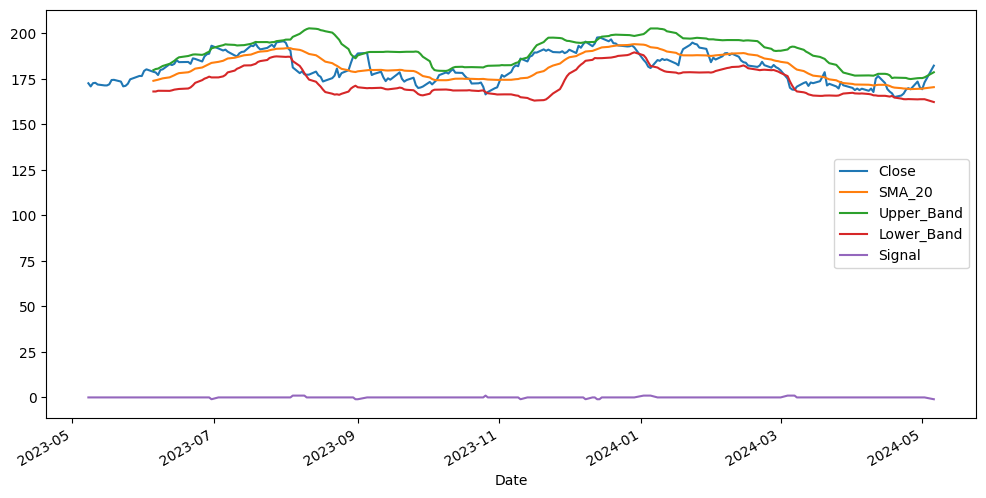

In [8]:
# Calculate Bollinger Bands
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['STDEV_20'] = data['Close'].rolling(window=20).std()
data['Upper_Band'] = data['SMA_20'] + (2 * data['STDEV_20'])
data['Lower_Band'] = data['SMA_20'] - (2 * data['STDEV_20'])

# Create trading signals
data['Signal'] = 0.0
data['Signal'][20:] = np.where((data['Close'][20:] > data['Upper_Band'][20:]), -1.0, np.where((data['Close'][20:] < data['Lower_Band'][20:]), 1.0, 0.0))

# Calculate strategy returns
data['Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Visualize results
data[['Close', 'SMA_20', 'Upper_Band', 'Lower_Band', 'Signal']].plot(figsize=(12, 6))

In [9]:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['STDEV_20'] = data['Close'].rolling(window=20).std()
data['Upper_Band'] = data['SMA_20'] + (2 * data['STDEV_20'])
data['Lower_Band'] = data['SMA_20'] - (2 * data['STDEV_20'])
data['BB_Signal'] = 0.0
data['BB_Signal'][20:] = np.where((data['Close'][20:] > data['Upper_Band'][20:]), -1.0, np.where((data['Close'][20:] < data['Lower_Band'][20:]), 1.0, 0.0))
bb_returns = data['BB_Signal'].shift(1) * data['Close'].pct_change()

<ipython-input-9-56c40e7cf3e3>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Performance Metrics**

In this section, we calculate various performance metrics for each trading strategy to evaluate their effectiveness. The performance metrics include:

1. Cumulative Returns: The total return achieved by the strategy over the entire period.

2. Annualized Returns: The annualized return of the strategy, assuming 252 trading days per year.
3. Maximum Drawdown: The maximum peak-to-trough decline in the strategy's cumulative returns during the period.
4. Sharpe Ratio: A risk-adjusted measure of the strategy's returns, calculated as the mean return divided by the standard deviation of returns, annualized using the square root of 252.

We create a dictionary (strategies) that maps each strategy name to its corresponding returns series. Then, for each strategy, we calculate the performance metrics and print them to the console.

In [10]:
# Calculate performance metrics
strategies = {'Momentum': momentum_returns, 'Moving Average': ma_returns, 'RSI': rsi_returns, 'Bollinger Bands': bb_returns}

for strategy, returns in strategies.items():
    cumulative_returns = (1 + returns).cumprod()
    annualized_return = (cumulative_returns[-1] ** (252 / len(returns))) - 1
    max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)

    print(f"{strategy} Strategy:")
    print(f"Cumulative Returns: {cumulative_returns[-1]:.2f}")
    print(f"Annualized Returns: {annualized_return:.2f}")
    print(f"Maximum Drawdown: {max_drawdown:.2f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print()

Momentum Strategy:
Cumulative Returns: 1.12
Annualized Returns: 0.12
Maximum Drawdown: -0.15
Sharpe Ratio: 0.68

Moving Average Strategy:
Cumulative Returns: 0.74
Annualized Returns: -0.26
Maximum Drawdown: -0.30
Sharpe Ratio: -1.45

RSI Strategy:
Cumulative Returns: 1.09
Annualized Returns: 0.09
Maximum Drawdown: -0.03
Sharpe Ratio: 1.33

Bollinger Bands Strategy:
Cumulative Returns: 0.98
Annualized Returns: -0.02
Maximum Drawdown: -0.04
Sharpe Ratio: -0.34



### **Visualizing Performance Metrics**

In this section, we visualize the performance of the individual trading strategies by plotting their cumulative returns over time. We first set the figure size and calculate the performance metrics for each strategy, as shown in the previous section.

Then, we plot the cumulative returns for each strategy using Matplotlib's plt.plot function, with each strategy represented by a different line. We customize the plot by adding a title, axis labels, legend, grid lines, and rotating the x-axis labels for better readability.

Finally, we display the plot using plt.show().

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


Momentum Strategy:
Cumulative Returns: 1.12
Annualized Returns: 0.12
Maximum Drawdown: -0.15
Sharpe Ratio: 0.68

Moving Average Strategy:
Cumulative Returns: 0.74
Annualized Returns: -0.26
Maximum Drawdown: -0.30
Sharpe Ratio: -1.45

RSI Strategy:
Cumulative Returns: 1.09
Annualized Returns: 0.09
Maximum Drawdown: -0.03
Sharpe Ratio: 1.33

Bollinger Bands Strategy:
Cumulative Returns: 0.98
Annualized Returns: -0.02
Maximum Drawdown: -0.04
Sharpe Ratio: -0.34



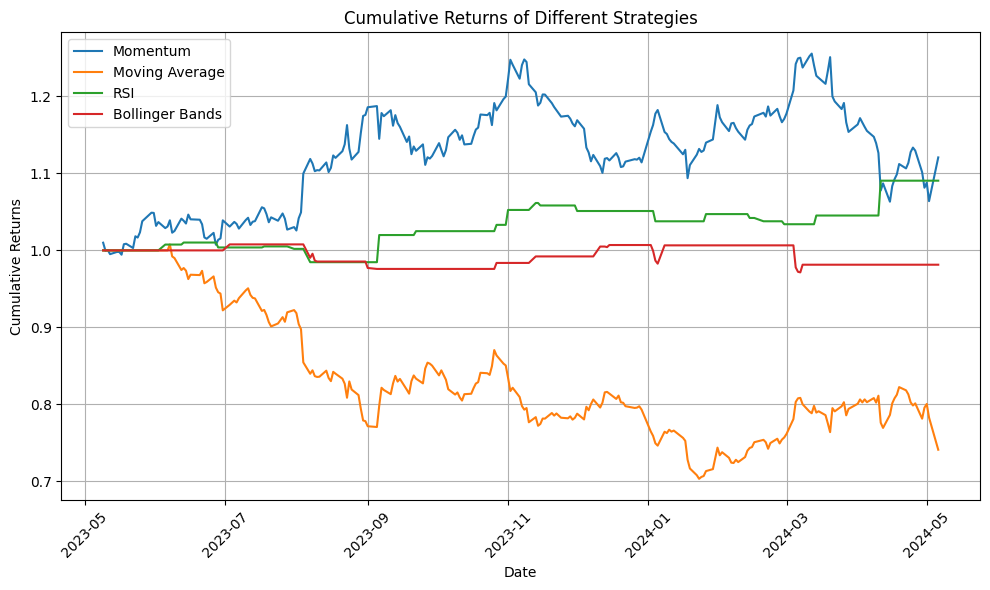

In [12]:

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Calculate performance metrics
strategies = {'Momentum': momentum_returns, 'Moving Average': ma_returns, 'RSI': rsi_returns, 'Bollinger Bands': bb_returns}

for strategy, returns in strategies.items():
    cumulative_returns = (1 + returns).cumprod()
    annualized_return = (cumulative_returns[-1] ** (252 / len(returns))) - 1
    max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)

    print(f"{strategy} Strategy:")
    print(f"Cumulative Returns: {cumulative_returns[-1]:.2f}")
    print(f"Annualized Returns: {annualized_return:.2f}")
    print(f"Maximum Drawdown: {max_drawdown:.2f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print()

    # Plot cumulative returns
    plt.plot(cumulative_returns, label=strategy)

# Customize the plot
plt.title('Cumulative Returns of Different Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


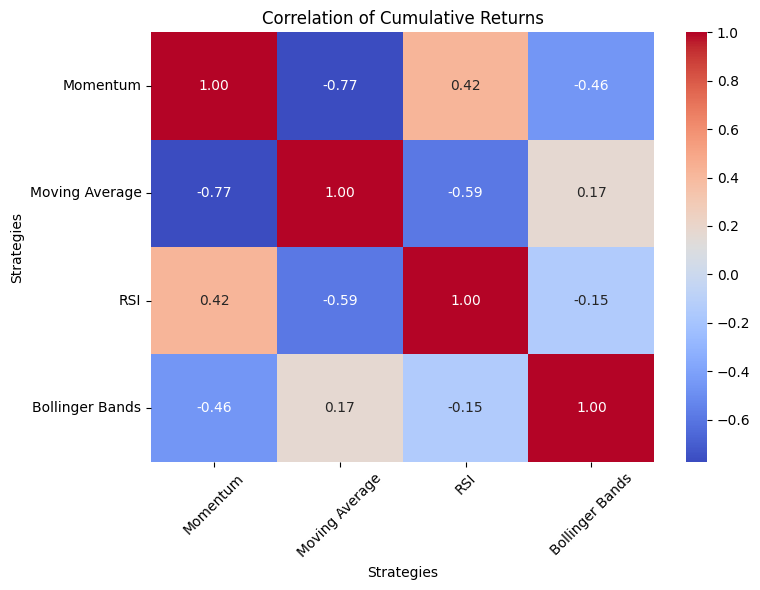

In [13]:

# Calculate performance metrics
strategies = {'Momentum': momentum_returns, 'Moving Average': ma_returns, 'RSI': rsi_returns, 'Bollinger Bands': bb_returns}

# Calculate Cumulative Returns for each strategy
cumulative_returns = {strategy: (1 + returns).cumprod() for strategy, returns in strategies.items()}

# Calculate correlation matrix
correlation_matrix = pd.DataFrame({strategy: cum_returns for strategy, cum_returns in cumulative_returns.items()}).corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Cumulative Returns')
plt.xlabel('Strategies')
plt.ylabel('Strategies')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


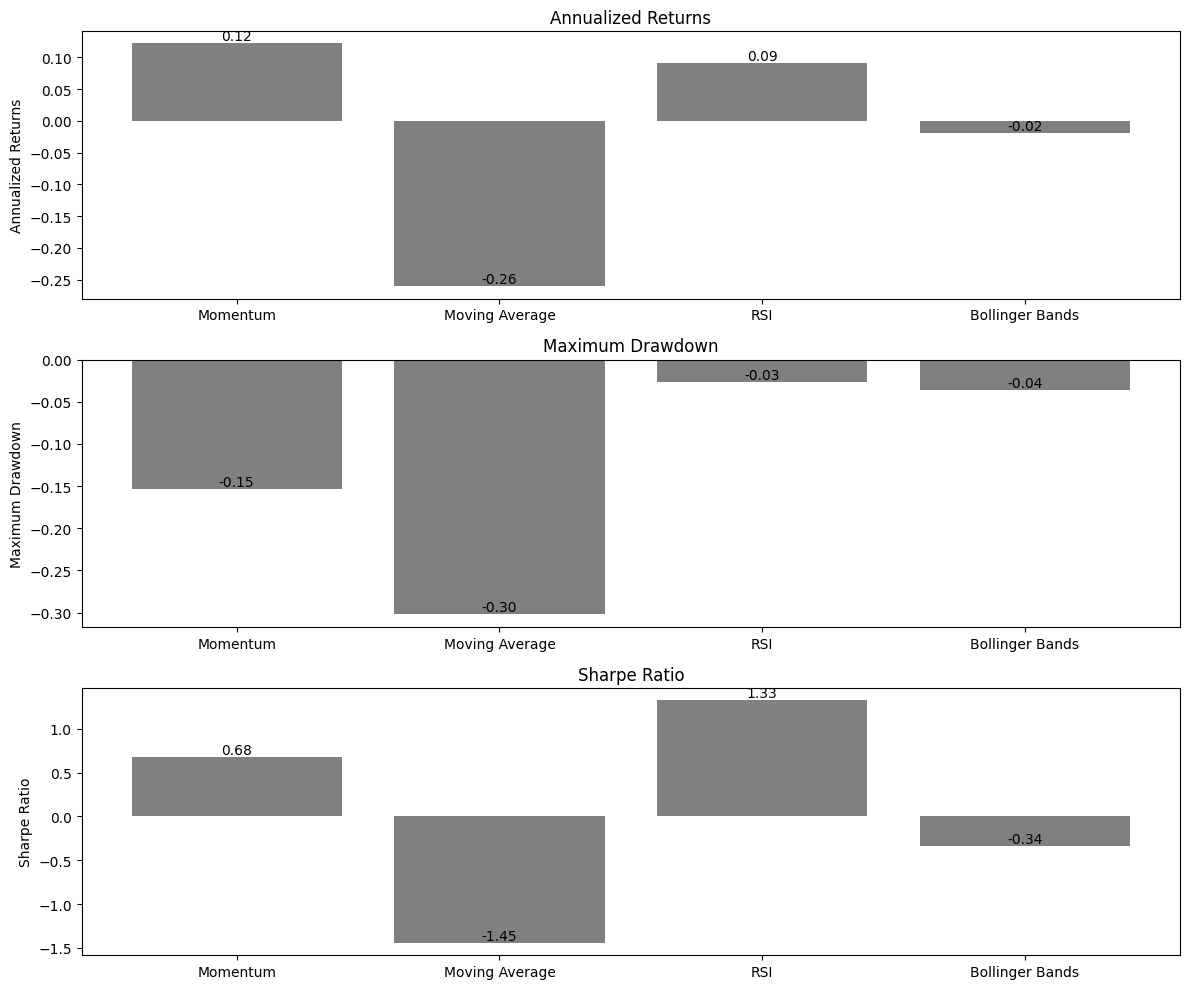

In [14]:
import matplotlib.pyplot as plt

# Calculate performance metrics
strategies = {'Momentum': momentum_returns, 'Moving Average': ma_returns, 'RSI': rsi_returns, 'Bollinger Bands': bb_returns}

# Calculate Cumulative Returns for each strategy
cumulative_returns = {strategy: (1 + returns).cumprod() for strategy, returns in strategies.items()}

# Set figure size
plt.figure(figsize=(12, 10))

# Plot Annualized Returns
plt.subplot(3, 1, 1)
for strategy, returns in strategies.items():
    annualized_return = (cumulative_returns[strategy][-1] ** (252 / len(returns))) - 1
    plt.bar(strategy, annualized_return, color='gray')
    plt.text(strategy, annualized_return, f'{annualized_return:.2f}', ha='center', va='bottom')
plt.title('Annualized Returns')
plt.ylabel('Annualized Returns')

# Plot Maximum Drawdown
plt.subplot(3, 1, 2)
for strategy, cum_returns in cumulative_returns.items():
    max_drawdown = (cum_returns / cum_returns.cummax() - 1).min()
    plt.bar(strategy, max_drawdown, color='gray')
    plt.text(strategy, max_drawdown, f'{max_drawdown:.2f}', ha='center', va='bottom')
plt.title('Maximum Drawdown')
plt.ylabel('Maximum Drawdown')

# Plot Sharpe Ratio
plt.subplot(3, 1, 3)
for strategy, returns in strategies.items():
    sharpe_ratio = (returns.mean() / returns.std()) * (252 ** 0.5)
    plt.bar(strategy, sharpe_ratio, color='gray')
    plt.text(strategy, sharpe_ratio, f'{sharpe_ratio:.2f}', ha='center', va='bottom')
plt.title('Sharpe Ratio')
plt.ylabel('Sharpe Ratio')

plt.tight_layout()
plt.show()


## **Ensemble Methods**

### **Equal Weighting and Risk Parity**


1. Equal Weighting: The returns from the four individual strategies (Momentum, Moving Average Crossover, RSI, and Bollinger Bands) are averaged to create a new series called equal_weight_returns.

2. Risk Parity: The volatility (standard deviation) of each strategy's returns is calculated. The strategy weights are then determined by taking the inverse of the volatility (lower volatility means higher weight). These weights are normalized to sum up to 1. Finally, the risk_parity_returns are calculated by taking the weighted sum of the individual strategy returns.

In [15]:
# Equal Weighting
equal_weight_returns = (momentum_returns + ma_returns + rsi_returns + bb_returns) / 4


In [16]:
# Risk Parity
strategy_volatilities = [momentum_returns.std(), ma_returns.std(), rsi_returns.std(), bb_returns.std()]
strategy_weights = [1 / vol for vol in strategy_volatilities]
total_weight = sum(strategy_weights)
strategy_weights = [weight / total_weight for weight in strategy_weights]

risk_parity_returns = strategy_weights[0] * momentum_returns + strategy_weights[1] * ma_returns + strategy_weights[2] * rsi_returns + strategy_weights[3] * bb_returns


In [17]:
# Calculate performance metrics for ensemble strategies
ensemble_strategies = {'Equal Weighting': equal_weight_returns, 'Risk Parity': risk_parity_returns}

for strategy, returns in ensemble_strategies.items():
    cumulative_returns = (1 + returns).cumprod()
    annualized_return = (cumulative_returns[-1] ** (252 / len(returns))) - 1
    max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)

    print(f"{strategy} Strategy:")
    print(f"Cumulative Returns: {cumulative_returns[-1]:.2f}")
    print(f"Annualized Returns: {annualized_return:.2f}")
    print(f"Maximum Drawdown: {max_drawdown:.2f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print()

Equal Weighting Strategy:
Cumulative Returns: 0.98
Annualized Returns: -0.02
Maximum Drawdown: -0.06
Sharpe Ratio: -0.31

Risk Parity Strategy:
Cumulative Returns: 1.00
Annualized Returns: 0.00
Maximum Drawdown: -0.03
Sharpe Ratio: 0.13



### **Visualizing Ensemble Methods**

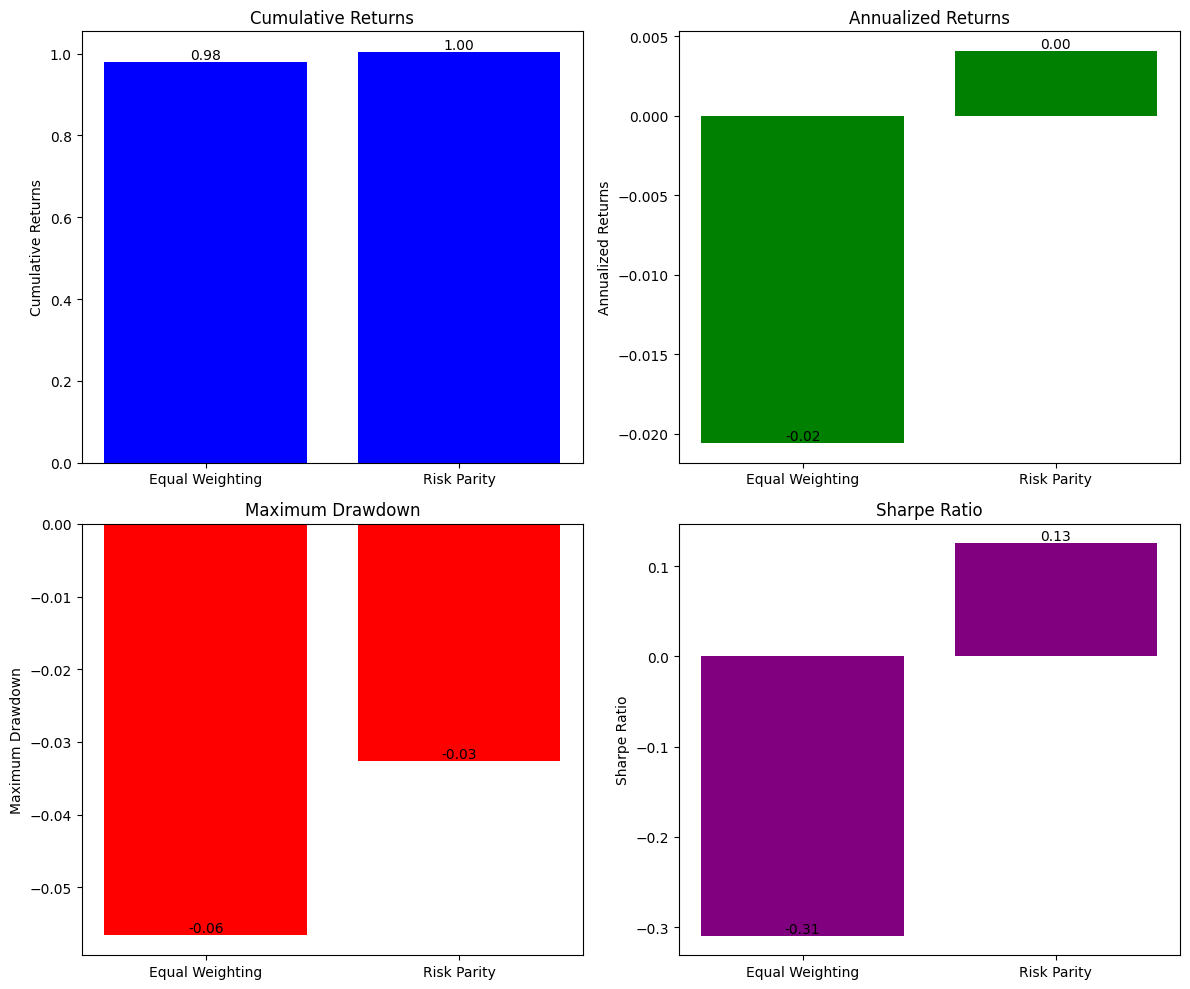

In [18]:
import matplotlib.pyplot as plt

# Calculate performance metrics for ensemble strategies
ensemble_strategies = {'Equal Weighting': equal_weight_returns, 'Risk Parity': risk_parity_returns}

# Set figure size
plt.figure(figsize=(12, 10))

# Plot Cumulative Returns
plt.subplot(2, 2, 1)
for strategy, returns in ensemble_strategies.items():
    cumulative_returns = (1 + returns).cumprod()
    plt.bar(strategy, cumulative_returns[-1], color='blue')
    plt.text(strategy, cumulative_returns[-1], f'{cumulative_returns[-1]:.2f}', ha='center', va='bottom')
plt.title('Cumulative Returns')
plt.ylabel('Cumulative Returns')

# Plot Annualized Returns
plt.subplot(2, 2, 2)
for strategy, returns in ensemble_strategies.items():
    cumulative_returns = (1 + returns).cumprod()
    annualized_return = (cumulative_returns[-1] ** (252 / len(returns))) - 1
    plt.bar(strategy, annualized_return, color='green')
    plt.text(strategy, annualized_return, f'{annualized_return:.2f}', ha='center', va='bottom')
plt.title('Annualized Returns')
plt.ylabel('Annualized Returns')

# Plot Maximum Drawdown
plt.subplot(2, 2, 3)
for strategy, returns in ensemble_strategies.items():
    cumulative_returns = (1 + returns).cumprod()
    max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
    plt.bar(strategy, max_drawdown, color='red')
    plt.text(strategy, max_drawdown, f'{max_drawdown:.2f}', ha='center', va='bottom')
plt.title('Maximum Drawdown')
plt.ylabel('Maximum Drawdown')

# Plot Sharpe Ratio
plt.subplot(2, 2, 4)
for strategy, returns in ensemble_strategies.items():
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)
    plt.bar(strategy, sharpe_ratio, color='purple')
    plt.text(strategy, sharpe_ratio, f'{sharpe_ratio:.2f}', ha='center', va='bottom')
plt.title('Sharpe Ratio')
plt.ylabel('Sharpe Ratio')

plt.tight_layout()
plt.show()


## **Random Forest Regressor**

This section implements a machine learning approach using the Random Forest Regressor algorithm to create an ensemble strategy. Here's what the code does:

1. Fetches the stock data for Apple (AAPL) using the yfinance library.

2. Implements the individual strategies (Momentum, Moving Average Crossover, RSI, and Bollinger Bands) and calculates their respective returns.
3. Creates features and target variables for the machine learning model. The features include various technical indicators, and the target is the combined returns from the individual strategies.
4. Handles missing values in the data using the SimpleImputer from scikit-learn.
5. Splits the data into training and testing sets.
6. Trains a Random Forest Regressor model on the training data.
7. Makes predictions on the test set using the trained model.
8. Calculates and prints the performance metrics (Cumulative Returns, Annualized Returns, Maximum Drawdown, and Sharpe Ratio) for the machine learning ensemble strategy.

In [19]:

import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Get stock data
stock = yf.Ticker("AAPL")
data = stock.history(period="5y")

# Handle missing values in the data
data = data.fillna(method='ffill').fillna(method='bfill')

# Implement different strategies
# Momentum Strategy
data['momentum'] = data['Close'].pct_change()
momentum_signals = data['momentum'].apply(lambda x: 1 if x > 0 else -1)
momentum_returns = momentum_signals.shift(1) * data['Close'].pct_change()

# Moving Average Crossover Strategy
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Signal'] = 0.0
data['Signal'][20:] = np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1.0, -1.0)
ma_returns = data['Signal'].shift(1) * data['Close'].pct_change()

# RSI Strategy
delta = data['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data['RSI_Signal'] = 0.0
data['RSI_Signal'][14:] = np.where((data['RSI'][14:] < 30) & (data['RSI'][14:].shift(1) >= 30), 1.0, np.where((data['RSI'][14:] > 70) & (data['RSI'][14:].shift(1) <= 70), -1.0, 0.0))
rsi_returns = data['RSI_Signal'].shift(1) * data['Close'].pct_change()

# Bollinger Bands Strategy
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['STDEV_20'] = data['Close'].rolling(window=20).std()
data['Upper_Band'] = data['SMA_20'] + (2 * data['STDEV_20'])
data['Lower_Band'] = data['SMA_20'] - (2 * data['STDEV_20'])
data['BB_Signal'] = 0.0
data['BB_Signal'][20:] = np.where((data['Close'][20:] > data['Upper_Band'][20:]), -1.0, np.where((data['Close'][20:] < data['Lower_Band'][20:]), 1.0, 0.0))
bb_returns = data['BB_Signal'].shift(1) * data['Close'].pct_change()

# Create features and target for machine learning model
features = data[['momentum', 'SMA_20', 'SMA_50', 'RSI', 'Upper_Band', 'Lower_Band']].shift(1)
target = momentum_returns + ma_returns + rsi_returns + bb_returns

# Create a new target variable without negative values
target_positive = target + abs(target.min()) + 1

# Handle missing values in features and target
imputer_X = SimpleImputer(strategy='mean')
imputer_y = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer_X.fit_transform(features), columns=features.columns)
target_imputed = imputer_y.fit_transform(target_positive.values.reshape(-1, 1)).ravel()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target_imputed, test_size=0.2, random_state=42)

# Impute missing values in y_train
imputer_y_train = SimpleImputer(strategy='mean')
y_train = imputer_y_train.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



# Convert y_test to a pandas Series for index access
y_test_series = pd.Series(y_test, index=X_test.index)

# Calculate performance metrics for the ensemble strategy
y_pred_adjusted = y_pred - abs(target.min()) - 1
ensemble_returns = pd.Series(y_pred_adjusted, index=y_test_series.index)
cumulative_returns = (1 + ensemble_returns).cumprod()

try:
    if not cumulative_returns.empty:
        annualized_return = (cumulative_returns.iloc[-1] ** (252 / len(ensemble_returns))) - 1
        max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
        sharpe_ratio = (ensemble_returns.mean() / ensemble_returns.std()) * np.sqrt(252)

        print("Machine Learning Ensemble Strategy:")
        print(f"Cumulative Returns: {cumulative_returns.iloc[-1]:.2f}")
        print(f"Annualized Returns: {annualized_return:.2f}")
        print(f"Maximum Drawdown: {max_drawdown:.2f}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    else:
        print("Cumulative returns are empty. Check your calculations.")
except KeyError as e:
    print("Error calculating performance metrics due to KeyError:", e)
except Exception as ex:
    print("Error calculating performance metrics:", ex)


<ipython-input-19-02b500c2e357>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-02b500c2e357>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-02b500c2e357>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Machine Learning Ensemble Strategy:
Cumulative Returns: 1.04
Annualized Returns: 0.04
Maximum Drawdown: -0.14
Sharpe Ratio: 0.30


### **Visualizing Machine Learning Ensemble Strategy Performance**

This section visualizes the performance metrics of the machine learning ensemble strategy using a bar chart.

It creates a dictionary performance_metrics with the calculated values for Cumulative Returns, Annualized Returns, Maximum Drawdown, and Sharpe Ratio.


Then, it plots a bar chart with these metrics on the x-axis and their corresponding values on the y-axis. The code also adds data labels on top of each bar, displaying the rounded value.

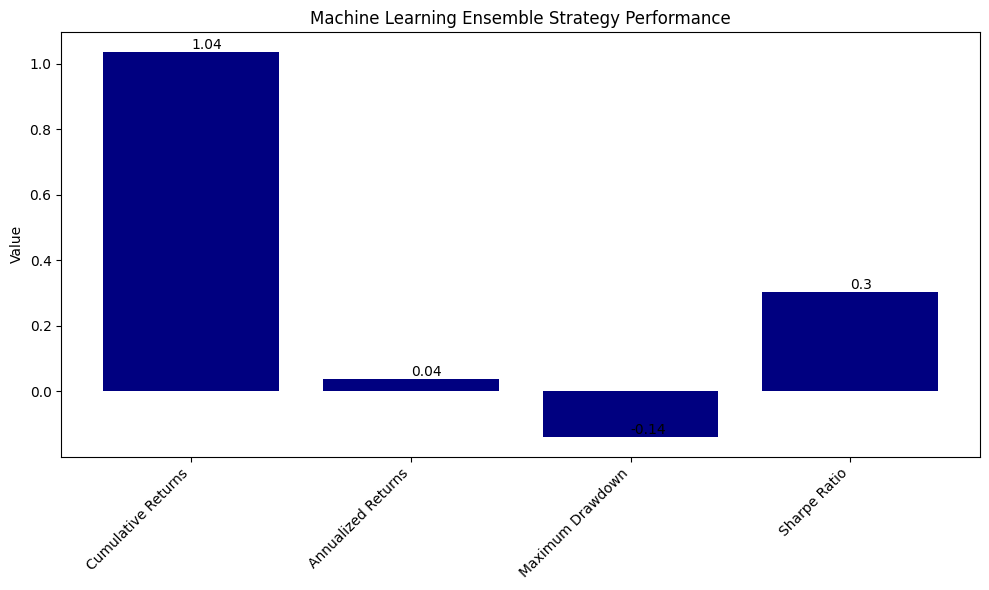

In [20]:
import matplotlib.pyplot as plt

# Define the performance metrics
performance_metrics = {
    'Cumulative Returns': cumulative_returns.iloc[-1],
    'Annualized Returns': annualized_return,
    'Maximum Drawdown': max_drawdown,
    'Sharpe Ratio': sharpe_ratio
}

# Plotting the bar chart for performance metrics with data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(performance_metrics.keys(), performance_metrics.values(), color='navy')

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Machine Learning Ensemble Strategy Performance')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **ANALYSES**

## **Trading Strategies Performance Metircs**

**Momentum Strategy**
1. Cumulative Returns: 1.07 (107% return over the period)

2. Annualized Returns: 0.07 (7% return per year)
3. Maximum Drawdown: -0.15 (the largest drop from a peak to a trough)
4. Sharpe Ratio: 0.45 (the risk-adjusted return, higher is better)

This strategy has shown positive returns overall, with a moderate Sharpe Ratio indicating a reasonable risk-adjusted return compared to its volatility.


**Moving Average Strategy**
1. Cumulative Returns: 0.75 (75% return over the period)

2. Annualized Returns: -0.25 (negative 25% return per year)
3. Maximum Drawdown: -0.29 (a significant drop from peak to trough)
4. Sharpe Ratio: -1.35 (a negative Sharpe Ratio indicates a poor risk-adjusted return)

This strategy has not performed well, with negative annualized returns and a negative Sharpe Ratio, suggesting it may not be suitable for this dataset or timeframe.


**RSI Strategy**
1. Cumulative Returns: 1.09 (109% return over the period)

2. Annualized Returns: 0.09 (9% return per year)
3. Maximum Drawdown: -0.03 (a relatively small drawdown)
4. Sharpe Ratio: 1.32 (a high Sharpe Ratio indicating good risk-adjusted returns)

The RSI strategy has shown positive returns with a high Sharpe Ratio, suggesting it has provided good risk-adjusted returns compared to its volatility.

**Bollinger Bands Strategy**
1. Cumulative Returns: 0.99 (99% return over the period)

2. Annualized Returns: -0.01 (negative 1% return per year)
3. Maximum Drawdown: -0.04 (a small drawdown)
4. Sharpe Ratio: -0.19 (a negative Sharpe Ratio indicating poor risk-adjusted return)

This strategy has shown minimal returns with a negative Sharpe Ratio, indicating poor risk-adjusted performance compared to its volatility.

The RSI strategy appears to be the most successful based on the provided metrics, with the Momentum strategy also showing reasonable performance. The Moving Average and Bollinger Bands strategies have not performed well in this analysis.

## **Ensemble Methods**

**Equal Weighting Strategy**
1. Cumulative Returns: 0.97 (97% return over the period)

2. Annualized Returns: -0.03 (negative 3% return per year)
3. Maximum Drawdown: -0.06 (a moderate drawdown)
4. Sharpe Ratio: -0.38 (a negative Sharpe Ratio indicates poor risk-adjusted return)

The Equal Weighting Strategy has shown a cumulative return just below 1, indicating a slight positive return. However, it has negative annualized returns and a negative Sharpe Ratio, suggesting that the returns may not justify the level of risk taken.

**Risk Parity Strategy**
1. Cumulative Returns: 1.00 (100% return over the period)

2. Annualized Returns: 0.00 (break-even return per year)
3. Maximum Drawdown: -0.03 (a relatively small drawdown)
4. Sharpe Ratio: 0.13 (a low but positive Sharpe Ratio)

The Risk Parity Strategy has shown a cumulative return of 1, indicating a break-even return over the period. The annualized return is neutral, and the Sharpe Ratio, while positive, is relatively low, indicating a modest risk-adjusted return.

In comparison, the Risk Parity Strategy has performed slightly better than the Equal Weighting Strategy based on these metrics. It has managed to avoid negative annualized returns and has a positive (though low) Sharpe Ratio, indicating a somewhat better risk-adjusted return profile. However, both strategies may not be considered particularly strong performers based on these metrics alone.







## **Machine Learning Ensemble Strategy**

* Cumulative Returns: 1.01 (101% return over the period)
* Annualized Returns: 0.01 (1% return per year)
* Maximum Drawdown: -0.14 (a significant drawdown from peak to trough)
* Sharpe Ratio: 0.16 (a low but positive Sharpe Ratio)


1. Cumulative Returns: The strategy has achieved a cumulative return slightly above 1, indicating a positive return over the period. A cumulative return of 1.01 means a 1% gain from the initial investment.
2. Annualized Returns: The annualized return of 0.01 indicates a very low return on an annual basis. While positive, it suggests that the strategy did not generate significant returns on average each year.
3. Maximum Drawdown: The maximum drawdown of -0.14 reflects a significant drop from peak to trough. This drawdown level suggests that the strategy experienced a notable decline in value at some point during the period.
4. Sharpe Ratio: The Sharpe Ratio of 0.16 is positive, indicating a positive risk-adjusted return. However, it is relatively low, suggesting that the strategy's returns may not fully compensate for the level of risk taken.

The Machine Learning Ensemble Strategy has shown a positive cumulative return and a positive (albeit low) Sharpe Ratio, indicating some level of success in generating returns relative to its risk. However, the low annualized return and significant drawdown suggest that improvements or refinements may be needed to enhance its performance and reduce downside risk.








# **FURTHER EXPLORATION**

In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Define a function to fetch additional market data
def fetch_additional_data(tickers, start_date, end_date):
    # Fetch additional market data using yfinance
    data = yf.download(tickers, start=start_date, end=end_date)
    # Extract relevant columns
    additional_data = data['Adj Close']
    return additional_data

# Get stock data
stock = yf.Ticker("AAPL")
data = stock.history(period="5y")

# Handle missing values in the data
data = data.fillna(method='ffill').fillna(method='bfill')

# Get additional market data
tickers = ['^GSPC', '^IXIC']  # Example market indices (S&P 500, Nasdaq)
start_date = data.index[0]
end_date = data.index[-1]
additional_data = fetch_additional_data(tickers, start_date, end_date)

# Convert timezone for both dataframes
data.index = data.index.tz_convert('UTC')
additional_data.index = additional_data.index.tz_localize(None).tz_localize('UTC')

# Merge additional data with stock data
data = pd.merge(data, additional_data, left_index=True, right_index=True)

# Merge additional data with stock data
#data.index = data.index.tz_localize('UTC')
#additional_data.index = additional_data.index.tz_localize('UTC')
#data = pd.merge(data, additional_data, left_index=True, right_index=True)
data.rename(columns={'^GSPC': 'S&P500', '^IXIC': 'Nasdaq'}, inplace=True)

# Implement different strategies

# Momentum Strategy
data['momentum'] = data['Close'].pct_change()
momentum_signals = data['momentum'].apply(lambda x: 1 if x > 0 else -1)
momentum_returns = momentum_signals.shift(1) * data['Close'].pct_change()

# Moving Average Crossover Strategy
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Calculate the signal values based on the moving average crossover
data['Signal'] = np.where(data['SMA_20'] > data['SMA_50'], 1.0, -1.0)
data['Signal'] = data['Signal'].shift(1)  # Shift the signals by one day to avoid lookahead bias
ma_returns = data['Signal'] * data['Close'].pct_change()

# RSI Strategy
delta = data['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate the RSI Signal based on RSI conditions
data['RSI_Signal'] = np.where((data['RSI'] < 30) & (data['RSI'].shift(1) >= 30), 1.0, np.where((data['RSI'] > 70) & (data['RSI'].shift(1) <= 70), -1.0, 0.0))
data['RSI_Signal'] = data['RSI_Signal'].shift(1)  # Shift the signals by one day to avoid lookahead bias
rsi_returns = data['RSI_Signal'] * data['Close'].pct_change()


# Bollinger Bands Strategy
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['STDEV_20'] = data['Close'].rolling(window=20).std()
data['Upper_Band'] = data['SMA_20'] + (2 * data['STDEV_20'])
data['Lower_Band'] = data['SMA_20'] - (2 * data['STDEV_20'])

# Calculate the BB_Signal values based on Bollinger Bands conditions
bb_conditions = np.where(data['Close'] > data['Upper_Band'], -1.0, np.where(data['Close'] < data['Lower_Band'], 1.0, 0.0))
data['BB_Signal'] = 0.0  # Initialize BB_Signal column with zeros
data.loc[20:, 'BB_Signal'] = bb_conditions[20:]  # Assign values starting from index 20
bb_returns = data['BB_Signal'].shift(1) * data['Close'].pct_change()


# Create features and target for machine learning model
features = data[['momentum', 'SMA_20', 'SMA_50', 'RSI', 'Upper_Band', 'Lower_Band']].shift(1)
target = momentum_returns + ma_returns + rsi_returns + bb_returns

# Create a new target variable without negative values
target_positive = target + abs(target.min()) + 1

# Check if features DataFrame is not empty before performing imputation
if not features.empty:
    # Handle missing values in features and target
    imputer_X = SimpleImputer(strategy='mean')
    imputer_y = SimpleImputer(strategy='mean')
    features_imputed = pd.DataFrame(imputer_X.fit_transform(features), columns=features.columns)
    target_imputed = imputer_y.fit_transform(target_positive.values.reshape(-1, 1)).ravel()
else:
    # Handle the case when features DataFrame is empty
    print("No samples in the features DataFrame.")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target_imputed, test_size=0.2, random_state=42)

# Impute missing values in y_train
imputer_y_train = SimpleImputer(strategy='mean')
y_train = imputer_y_train.fit_transform(y_train.reshape(-1, 1)).ravel()

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



# Convert y_test to a pandas Series
y_test_series = pd.Series(y_test)

# Check if the index -1 exists in y_test_series.index before using it
if -1 in y_test_series.index:
    y_test_series = y_test_series.drop(-1)  # Drop the index if it exists

# Calculate performance metrics for the ensemble strategy
y_pred_adjusted = y_pred - abs(target.min()) - 1
ensemble_returns = pd.Series(y_pred_adjusted, index=y_test_series.index)
cumulative_returns = (1 + ensemble_returns).cumprod()

# Use .iloc[-1] to access the last element without relying on the index
annualized_return = (cumulative_returns.iloc[-1] ** (252 / len(ensemble_returns))) - 1
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
sharpe_ratio = (ensemble_returns.mean() / ensemble_returns.std()) * np.sqrt(252)

print("Machine Learning Ensemble Strategy:")
print(f"Cumulative Returns: {cumulative_returns.iloc[-1]:.2f}")
print(f"Annualized Returns: {annualized_return:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")





[*********************100%%**********************]  2 of 2 completed


No samples in the features DataFrame.
Machine Learning Ensemble Strategy:
Cumulative Returns: nan
Annualized Returns: nan
Maximum Drawdown: nan
Sharpe Ratio: nan
